In [1]:
import underworld as uw
from underworld import function as fn
import glucifer
import numpy as np

res = 32
boxHeight = 1.0
aspect_ratio = 0.5

# A mesh to solve velocity and pressure

VPmesh = uw.mesh.FeMesh_Cartesian( elementType = ("Q2/dPc1"), 
                                   elementRes  = (int(res * aspect_ratio), res), 
                                   minCoord    = (0., 0.), 
                                   maxCoord    = (boxHeight*aspect_ratio, boxHeight))

velocityField    = uw.mesh.MeshVariable( mesh=VPmesh,         nodeDofCount=2 )
pressureField    = uw.mesh.MeshVariable( mesh=VPmesh.subMesh, nodeDofCount=1 )

velocityField.data[:,:] = 0.0
pressureField.data[:] = 0.0


# Boundary conditions - free slip:
#    Vx on side walls (0) 
#    Vy on top / bottom (0)

vxConstrained = VPmesh.specialSets["MinI_VertexSet"] + \
                VPmesh.specialSets["MaxI_VertexSet"] 

vyConstrained = VPmesh.specialSets["MinJ_VertexSet"] + \
                VPmesh.specialSets["MaxJ_VertexSet"]

## Solution

In [2]:
node = len(VPmesh.data)/2

vyConstrained.add([node])

velocityField.data[node,1] = 1.0



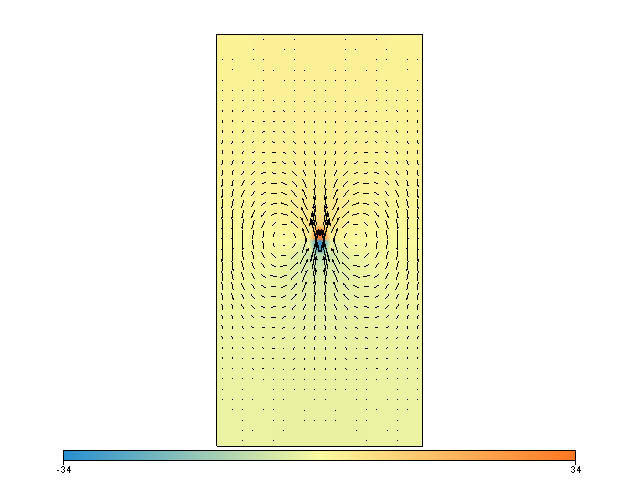

In [7]:
# Now register this information

velocityBC = uw.conditions.DirichletCondition( variable = velocityField, 
                                               indexSetsPerDof = (vxConstrained, 
                                                                  vyConstrained) )


# The equations are templated already 

stokesPIC = uw.systems.Stokes( velocityField  = velocityField, 
                               pressureField  = pressureField,
                               conditions     = [velocityBC,],
                               fn_viscosity   = 1.0, 
                               fn_bodyforce   = (0.0,0.0) )

# And a suitable solver package is already attached to it

solver = uw.systems.Solver( stokesPIC )

# Solve and see if it worked 

solver.solve()

fig2 = glucifer.Figure()
fig2.append( glucifer.objects.VectorArrows( VPmesh, velocityField, resolutionI=20, resolutionJ=40, 
                                            arrowHead=0.2, scaling=0.2 ) )
fig2.append( glucifer.objects.Surface( VPmesh, pressureField ) )
fig2.show()